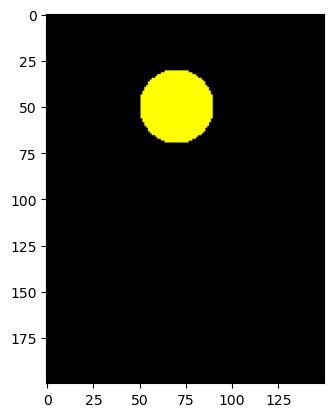

In [2]:
import ita

def count_neighbor(data, i, j):
    count = 0
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            if dx == 0 and dy == 0:
                continue
            x = i + dx
            y = j + dy
            if 0 <= x < len(data) and 0 <= y < len(data[0]) and data[x][y] == 1:
                count += 1
    return count

def lifegame_rule(cur, neighbor):
    if cur == 1 and (neighbor < 2 or neighbor > 3):
        return 0
    elif cur == 0 and neighbor == 3:
        return 1
    else:
        return cur

def lifegame_step(data):
    new_data = ita.array.make2d(len(data), len(data[0]))
    for i in range(len(data)):
        for j in range(len(data[0])):
            neighbor_count = count_neighbor(data, i, j)
            new_data[i][j] = lifegame_rule(data[i][j], neighbor_count)
    return new_data

def lifegame(data, steps):
    results = ita.array.make1d(steps)
    current_data = data
    for step in range(steps):
        results[step] = current_data
        current_data = lifegame_step(current_data)
    return results

# Visualization
def draw_circle(r, center_y, center_x, color, image):
    for i in range(len(image)):
        for j in range(len(image[0])):
            if distance(i, j, center_y, center_x) < r:
                image[i][j] = color
                
def distance(x1, y1, x2, y2):
    return ((x1-x2) ** 2 + (y1-y2) ** 2) ** 0.5

# Example usage
def main():
    # Glider pattern
    glider = ita.lifegame_glider()
    glider_animation = lifegame(glider, 10)
    ita.plot.animation_show(glider_animation)

    # Acorn pattern
    acorn = ita.lifegame_acorn()
    acorn_animation = lifegame(acorn, 10)
    ita.plot.animation_show(acorn_animation)

# Drawing a circle
image = ita.array.make3d(200, 150, 3)
draw_circle(20, 50, 70, [1, 1, 0], image)
ita.plot.image_show(image)


